In [122]:
# OneWay ANOVA 单因素方差检验
# 用来比较不同分组的数据是否有显著的差异F值（F值 = 组间差异 / 组内差异）
# 以及这种显著差异是随机的可能性有多大P值（P越小，说明这种差异越不是随机，而是相关的）
# 用法，修改以下超参数即可
# 超参数
VAULE_X = 'holidays'
VAULE_Y = 'amount'

import pandas as pd

# 读取excel文件并获取指定列
#df = pd.read_csv('Data\store_6922.csv', usecols=['dt', 'amt', 'discount_amount', 'pay_amount', 'num', 'discount', 'discount_percent', 'workdays', 'holidays', 'weekdays', 'text_day', 'text_night', 'high', 'low', 'high_low', 'wc_day'], encoding='GBK')
df = pd.read_csv('Data\结果1_全站按日数据_最近2年数据.csv', usecols=['date', 'amount', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'holidays'], encoding='GBK')
print(df)

          date  order_cnt        amount text_day text_night  high  low wc_day  \
0     2023-1-1     893054  2.641542e+08        阴          阴     8    5    <3级   
1     2023-1-2    1042898  3.133427e+08        阴         多云     9    0    <3级   
2     2023-1-3    1174827  3.669793e+08       多云         多云     9    0    <3级   
3     2023-1-4     863885  2.660003e+08       多云         多云    12    3   3~4级   
4     2023-1-5     885530  2.761225e+08       多云         多云    13    2    <3级   
..         ...        ...           ...      ...        ...   ...  ...    ...   
146  2023-5-27     152688  6.893097e+07      雷阵雨          阴    27   22   3~4级   
147  2023-5-28     144274  6.454768e+07        雾        雷阵雨    36   23   4~5级   
148  2023-5-29     188121  8.248444e+07       阵雨          阴    32   22   3~4级   
149  2023-5-30      10435  5.425916e+06       小雨          阴    22   20   3~4级   
150  2023-5-31          1  2.829200e+02        阴         多云    25   20    <3级   

    wd_day wc_night wd_nigh

In [123]:
# 使用 groupby 函数按天气分组，并获取每组的销量数据
value_X = VAULE_X
value_Y = VAULE_Y
coloum_groups = df.groupby(value_X)[value_Y].apply(list)
# 打印结果
for coloum, sales_array in coloum_groups.items():
    print(f"{coloum} 的销量数组: {sales_array}")

星期一 的销量数组: [313342671.6, 324428101.5, 378840662.0, 207570319.1, 87071219.76, 93142003.51, 109025250.9, 116360524.5, 123538705.1, 116370046.9, 125283194.1, 122682145.1, 137337793.2, 125738833.2, 86818985.8, 161574014.7, 81960853.81, 53754095.86, 83448960.41, 72072311.83, 74059753.51, 82484440.23]
星期三 的销量数组: [266000333.6, 345378925.6, 425025853.6, 266126253.3, 108982019.9, 106059133.9, 116519547.9, 121481267.7, 118285836.9, 108156745.5, 120681468.8, 131554646.6, 138139807.1, 94178132.23, 93911858.67, 74671424.14, 80186709.06, 60158246.97, 78644387.41, 100562993.2, 75789803.66, 282.92]
星期二 的销量数组: [366979346.9, 339684041.3, 360766558.4, 244080592.4, 96682459.93, 104609795.4, 113761391.6, 126979791.3, 117325368.3, 114070203.5, 124146800.1, 122464701.0, 142336967.1, 126175893.1, 86341093.11, 59220463.78, 86348483.21, 61249839.78, 83046040.45, 69363525.66, 80964952.01, 5425916.17]
星期五 的销量数组: [343316550.9, 441316292.0, 407686367.6, 67692891.98, 153432525.6, 115475509.3, 121871547.0, 128275626.

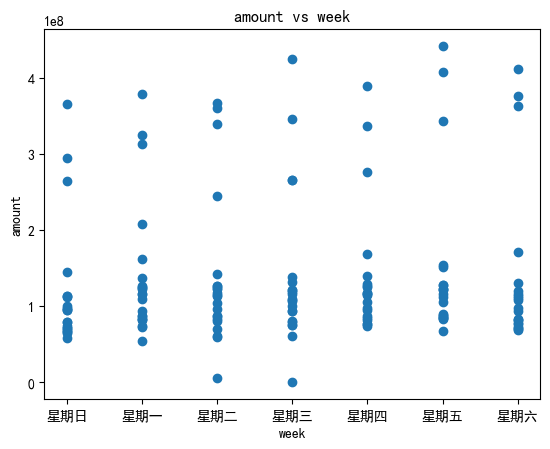

F 统计量: 0.20490885296011882
P 值: 0.9748035290160257


In [124]:
#画出散点图
import matplotlib.pyplot as plt

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体


# 绘制散点图
plt.scatter(df[value_X], df[value_Y])

# 添加标题和坐标轴标签
plt.title(value_Y+' vs '+value_X)
plt.xlabel(value_X)
plt.ylabel(value_Y)

# 显示图形
plt.show()

# 进行单因素方差分析
f_statistic, p_value = f_oneway(*coloum_groups)


# 打印结果
print("F 统计量:", f_statistic)
print("P 值:", p_value)

In [125]:

# IQR法去除所有value_Y(销量)里的异常值

# 计算指定列的下四分位数（Q1）和上四分位数（Q3）
q1 = df[value_Y].quantile(0.25)
q3 = df[value_Y].quantile(0.75)

# 计算 IQR
iqr = q3 - q1

# 定义上下界
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 删除异常值所在的行
df2 = df[(df[value_Y] >= lower_bound) & (df[value_Y] <= upper_bound)]


# 输出处理后的结果
print(df2)

          date  order_cnt        amount text_day text_night  high  low wc_day  \
21   2023-1-22     534310  1.447037e+08        阴          阴     8    3   3~4级   
25   2023-1-26     602848  1.680202e+08       多云         多云     6   -3   3~4级   
26   2023-1-27     203183  6.769289e+07       多云          晴     3   -6   3~4级   
27   2023-1-28     185226  6.966687e+07        晴          晴     7   -2   3~4级   
28   2023-1-29     193367  7.935717e+07        晴          晴    11   -1   3~4级   
..         ...        ...           ...      ...        ...   ...  ...    ...   
144  2023-5-25     164963  7.371985e+07        雾          阴    26   19    <3级   
145  2023-5-26     188022  8.312239e+07      雷阵雨         中雨    28   22   3~4级   
146  2023-5-27     152688  6.893097e+07      雷阵雨          阴    27   22   3~4级   
147  2023-5-28     144274  6.454768e+07        雾        雷阵雨    36   23   4~5级   
148  2023-5-29     188121  8.248444e+07       阵雨          阴    32   22   3~4级   

    wd_day wc_night wd_nigh

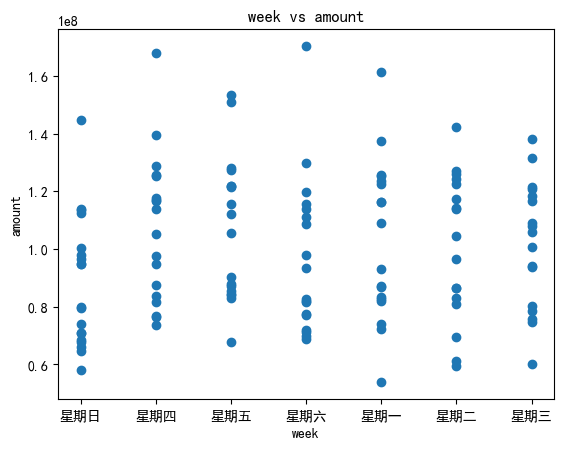

F 统计量: 1.3481134574509868
P 值: 0.24144591148310648


In [126]:

coloum_groups_df2 = df2.groupby(value_X)[value_Y].apply(list)


# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(df2[value_X], df2[value_Y])

# 添加标题和坐标轴标签
plt.title(value_X+' vs '+value_Y)
plt.xlabel(value_X)
plt.ylabel(value_Y)

# 显示图形
plt.show()

# 进行单因素方差分析
f_statistic, p_value = f_oneway(*coloum_groups_df2)

# 打印结果
print("F 统计量:", f_statistic)
print("P 值:", p_value)